# Importing Libraries & datasets

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
df = pd.read_excel("dataset\ProductA.xlsx")
df.set_index('Day Index', inplace=True)
df.head()

,Quantity
Day Index,
2021-12-01,14
2021-12-02,10
2021-12-03,13
2021-12-04,22
2021-12-05,33


# Checking stationarity of the data

In [33]:
def adfuller_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Perform Dickey-Fuller test on the Sales data
adfuller_test(df['Quantity'])

ADF Statistic: -4.445717448758575
p-value: 0.00024615679644112006
Critical Values:
	1%: -3.4621857592784546
	5%: -2.875537986778846
	10%: -2.574231080806213


ADF Statistic --> This is the test statistic for the Augmented Dickey-Fuller test. More negative values indicate stronger evidence against the null hypothesis.

 p-value --> is less than 0.05 (commonly used threshold), so reject the null hypothesis that the series has a unit root (i.e., the series is non-stationary). Hence, you conclude that the series is stationary.

Critical Values --> These are the critical values for different confidence levels. If the ADF statistic is less than the critical value (more negative) for a particular confidence level, you reject the null hypothesis at that confidence level. In your case, the ADF statistic (-4.4457) is less than all critical values, indicating strong evidence against the null hypothesis.

<b><i>Since, data series is stationary, therefore, value of d = 0 (no differencing required) 

# Plotting ACF/PACF plots

ACF  --> Autocorrelation function

PACF --> Partial Autocorrelation fucntion

These plots are used to compute the correlation of series with it's own lags

### ACF

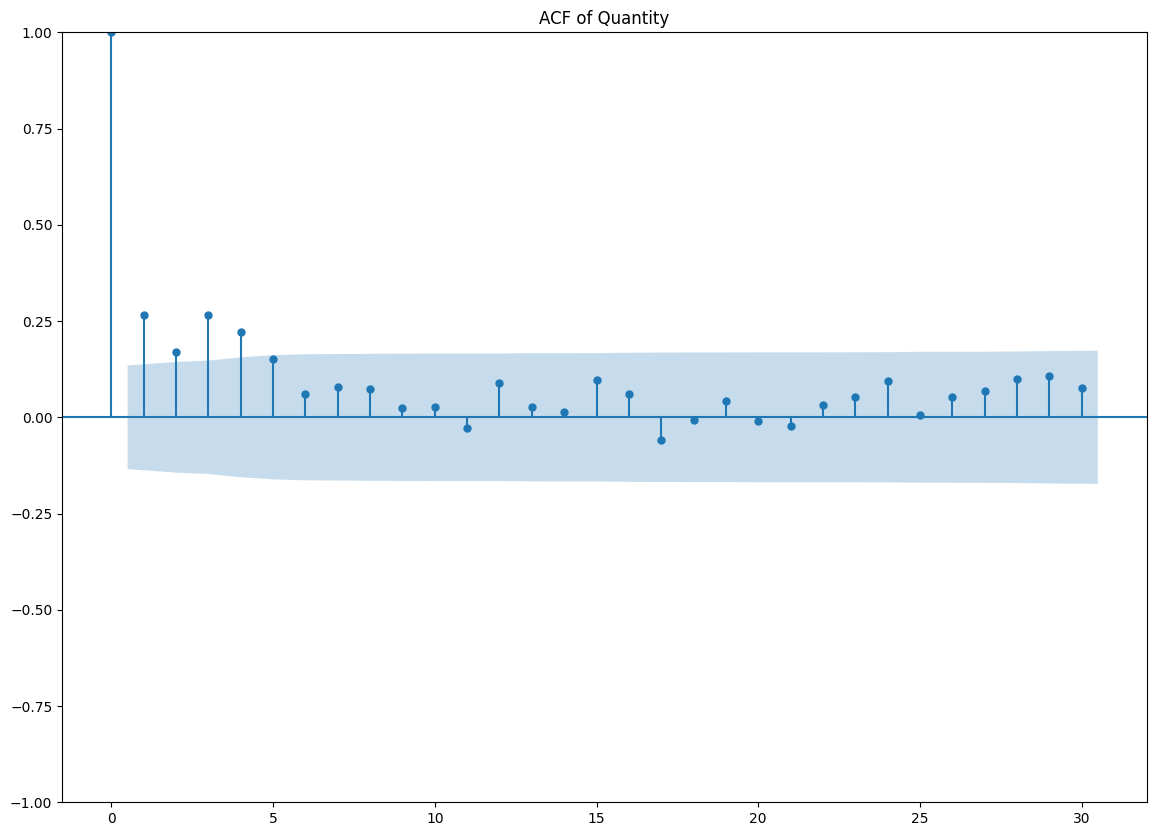

In [34]:
plt.figure(figsize=(14, 10))

# lag 30 for daily data spanning multiple months
plot_acf(df['Quantity'], lags=30, ax=plt.gca())        
plt.title('ACF of Quantity')
plt.show()

1st line --> correlation of (y, y)<br>
2nd line --> correlation of (y, lag1)<br>
3rd line --> correlation of (y, lag2)<br>
...<br>
The blue shaded region and it represents the significance line<br>
All lines crossing this blue shade are significant lines, <p>i.e. they have a statistically significant relationship with y.

### PACF

In PACF, we are finding the correlation of suppose lag 3 after removing the effect of its previous lags (lag1 and lag2)

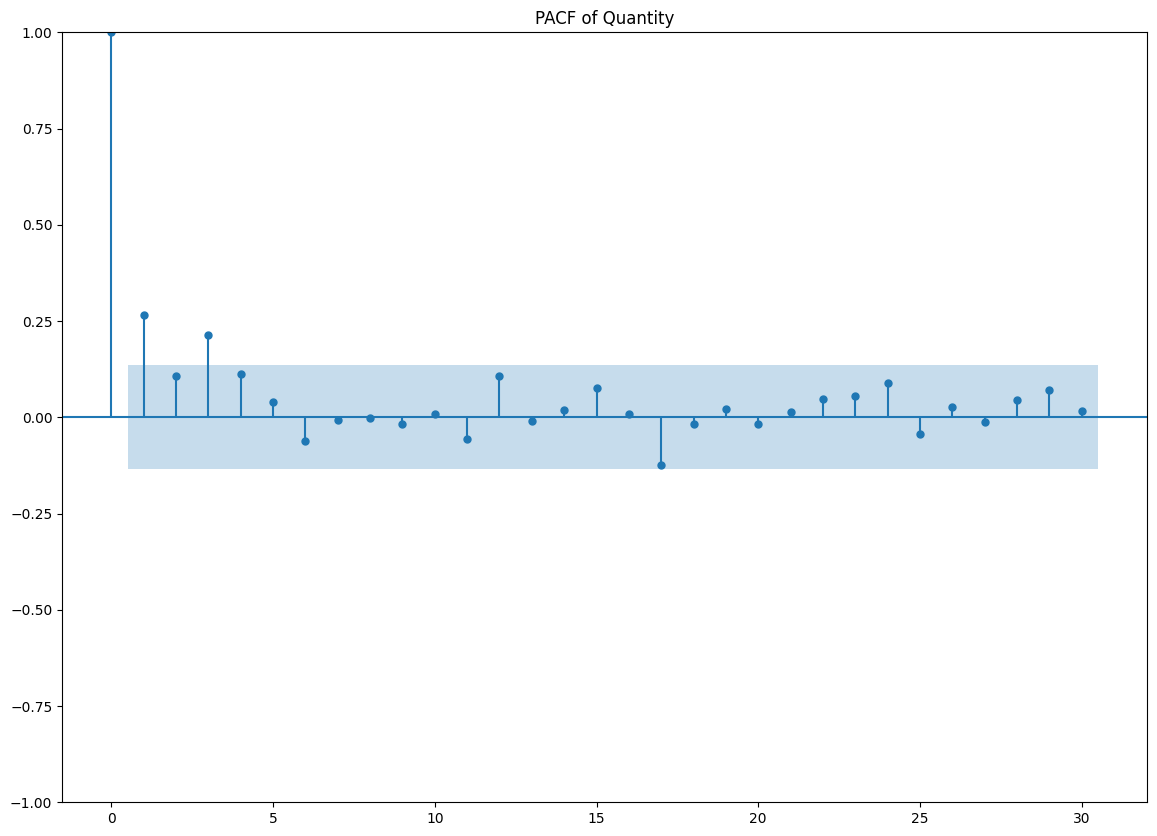

In [35]:
plt.figure(figsize=(14, 10))

# lag 30 for daily data spanning multiple months
plot_pacf(df['Quantity'], lags=30, ax=plt.gca())
plt.title('PACF of Quantity')
plt.show()

If ACF plot gradually decreases and plots near to zero in the middle <br>
And if PACF plot also has only 1-2 significant spikes,

Then, AR models should be used.

If ACF has 1 significant spike, then use AR1 model
If 2, then use AR2 model

An AR(1) autoregressive process is one in which the current value is based on the immediately preceding value, while an AR(2) process is one in which the current value is based on the previous two values

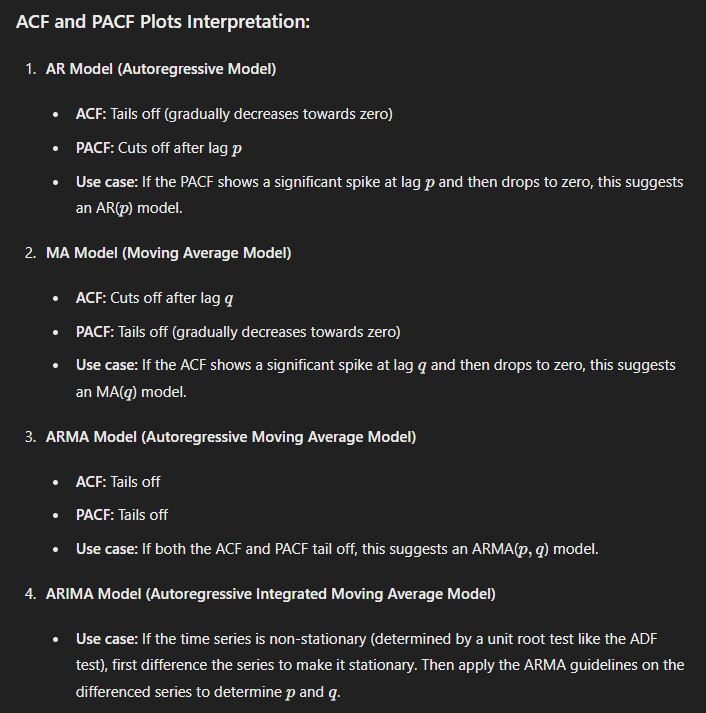

## Determining optimal parameters 

(p, d, q) = (AR, I, MA)

p: Determined by the PACF plot where the lag value drops off.

d: The number of differencing steps needed to make the series stationary.<br>
Since the series is stationary, d = 0

q: Determined by the ACF plot where the lag value drops off. 

<i><b>Hence, the value of p = 1 and q = 1 Since each plot have a single biggest spike

# ARIMA model

### Data Splitting 

<table>
  <tr>
    <th>Data set</th>
    <th>percentage</th>
    <th>Num of days</th>
  </tr>
  <tr>
    <td>train set</td>
    <td>60 %</td>
    <td>127 days</td>
  </tr>
  <tr>
    <td>validation set</td>
    <td>20 %</td>
    <td>42 days</td>
  </tr>
  <tr>
    <td>test set</td>
    <td>20 %</td>
    <td>43 days</td>
  </tr>
</table>



In [36]:
# Calculate the split indices
train_size = int(0.6 * len(df))
val_size = int(0.2 * len(df))
test_size = len(df) - train_size - val_size

# Split the df
train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

print("Train Data Size:\t", len(train_df))
print("Validation Data Size:\t", len(val_df))
print("Test Data Size:\t\t", len(test_df))

Train Data Size:	 127
Validation Data Size:	 42
Test Data Size:		 43


### Model Fitting

In [37]:
# order of ARIMA model
p, d, q = 1, 0, 1                                     

# fitting the model
model = ARIMA(train_df['Quantity'], order=(1, 0, 1))
result = model.fit()          

# Print model summary
print(result.summary())                       

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  127
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -402.309
Date:                Thu, 13 Jun 2024   AIC                            812.618
Time:                        13:57:56   BIC                            823.995
Sample:                    12-01-2021   HQIC                           817.240
                         - 04-06-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1879      1.048     17.349      0.000      16.133      20.243
ar.L1          0.7482      0.155      4.819      0.000       0.444       1.052
ma.L1         -0.5193      0.197     -2.633      0.0

c:\Users\jatin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jatin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jatin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Validation testing

c:\Users\jatin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


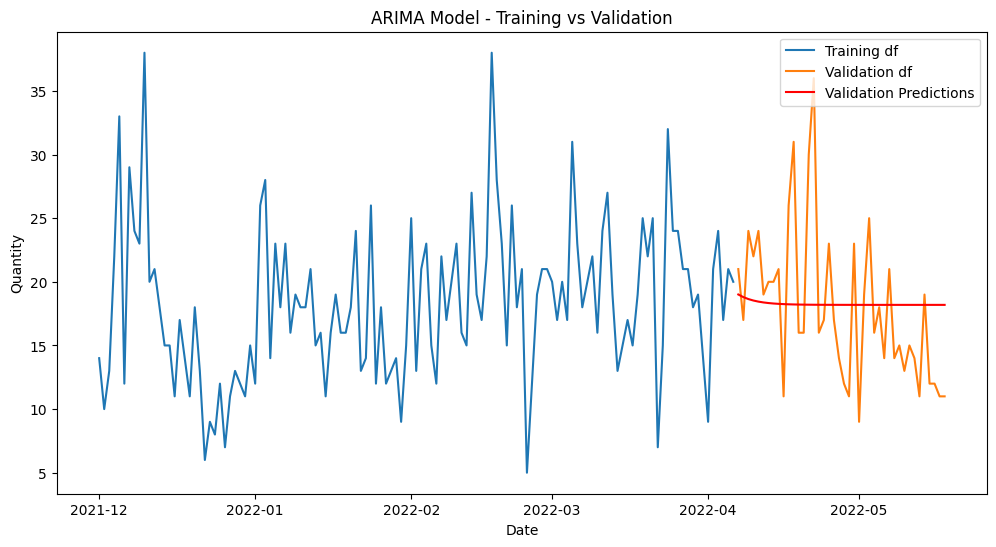


Validation set Metrics:

Mean Squared Error: 35.05135718042404
Mean Absolute Error: 4.746750557674151


In [38]:
# Make predictions on the validation set
start = len(train_df)
end = start + len(val_df) - 1
predictions = result.predict(start=start, end=end, typ='levels')

# plot the predictions with actuals for validation set
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['Quantity'], label='Training df')
plt.plot(val_df.index, val_df['Quantity'], label='Validation df')
plt.plot(val_df.index, predictions, label='Validation Predictions', color='red')
plt.title('ARIMA Model - Training vs Validation')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Calculate evaluation metrics for validation set
mse = mean_squared_error(val_df['Quantity'], predictions)
mae = mean_absolute_error(val_df['Quantity'], predictions)
print(f'\nValidation set Metrics:\n')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

### Test set testing

c:\Users\jatin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


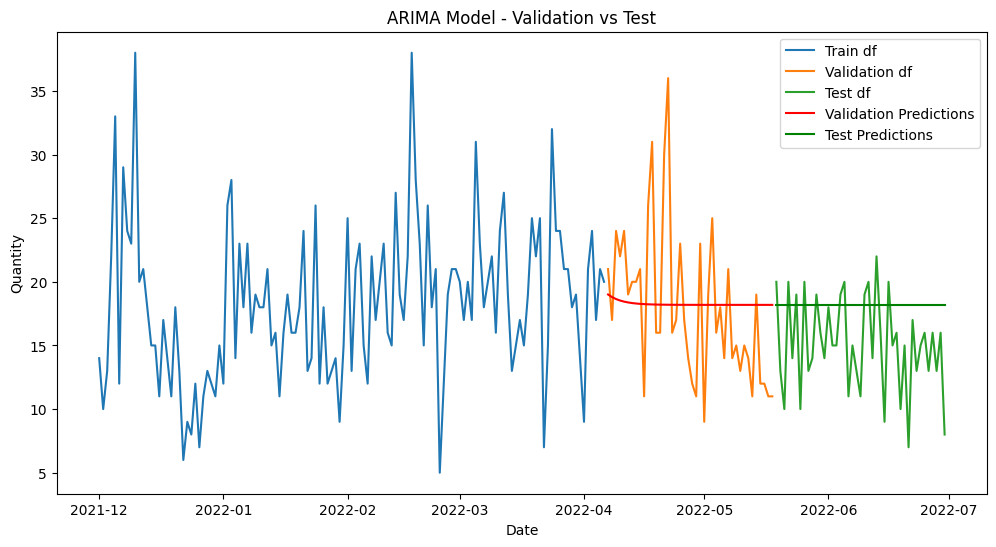


Test Set Metrics:

Mean Squared Error: 22.73237289436732
Mean Absolute Error: 3.9289722056512426


In [39]:
# Make predictions on the test set
start_test = len(train_df) + len(val_df)
end_test = start_test + len(test_df) - 1
predictions_test = result.predict(start=start_test, end=end_test, typ='levels')

# Plot predictions vs actuals for test set
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['Quantity'], label='Train df')
plt.plot(val_df.index, val_df['Quantity'], label='Validation df')
plt.plot(test_df.index, test_df['Quantity'], label='Test df')
plt.plot(val_df.index, predictions, label='Validation Predictions', color='red')
plt.plot(test_df.index, predictions_test, label='Test Predictions', color='green')
plt.title('ARIMA Model - Validation vs Test')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Calculate evaluation metrics for test set
mse_test = mean_squared_error(test_df['Quantity'], predictions_test)
mae_test = mean_absolute_error(test_df['Quantity'], predictions_test)
print(f'\nTest Set Metrics:\n')
print(f'Mean Squared Error: {mse_test}')
print(f'Mean Absolute Error: {mae_test}')

### Overall testing

c:\Users\jatin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


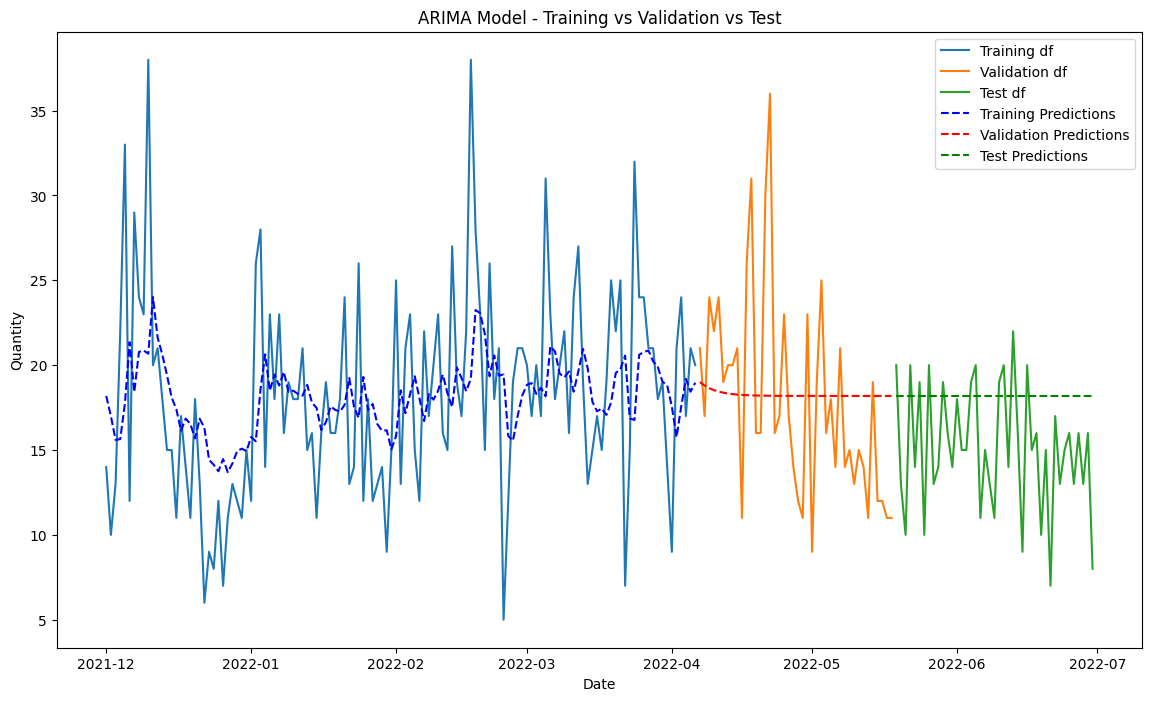

Validation Set Metrics:
Mean Squared Error: 35.05135718042404
Mean Absolute Error: 4.746750557674151

Test Set Metrics:
Mean Squared Error: 22.73237289436732
Mean Absolute Error: 3.9289722056512426


In [40]:
# Make predictions on the entire training set (for illustration purposes)
start_train = 0
end_train = len(train_df) - 1
predictions_train = result.predict(start=start_train, end=end_train, typ='levels')

# Make predictions on the validation set
start_val = len(train_df)
end_val = start_val + len(val_df) - 1
predictions_val = result.predict(start=start_val, end=end_val, typ='levels')

# Make predictions on the test set
start_test = len(train_df) + len(val_df)
end_test = start_test + len(test_df) - 1
predictions_test = result.predict(start=start_test, end=end_test, typ='levels')

#---------------------------------------------------------------------------------------------------------------------------

# Plot predictions vs actuals for training set, validation set, and test set
plt.figure(figsize=(14, 8))

# Training set
plt.plot(train_df.index, train_df['Quantity'], label='Training df')

# Validation set
plt.plot(val_df.index, val_df['Quantity'], label='Validation df')

# Test set
plt.plot(test_df.index, test_df['Quantity'], label='Test df')

# Training predictions
plt.plot(train_df.index, predictions_train, label='Training Predictions', color='blue', linestyle='--')

# Validation predictions
plt.plot(val_df.index, predictions_val, label='Validation Predictions', color='red', linestyle='--')

# Test predictions
plt.plot(test_df.index, predictions_test, label='Test Predictions', color='green', linestyle='--')

plt.title('ARIMA Model - Training vs Validation vs Test')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------------------------------

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(val_df['Quantity'], predictions_val)
mae_val = mean_absolute_error(val_df['Quantity'], predictions_val)

print(f'Validation Set Metrics:')
print(f'Mean Squared Error: {mse_val}')
print(f'Mean Absolute Error: {mae_val}')

# Calculate evaluation metrics for test set
mse_test = mean_squared_error(test_df['Quantity'], predictions_test)
mae_test = mean_absolute_error(test_df['Quantity'], predictions_test)

print(f'\nTest Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'Mean Absolute Error: {mae_test}')


<table>
  <tr>
    <th>Metrics</th>
    <th>Validation set</th>
    <th>Test set</th>
  </tr>
  <tr>
    <th>Mean Squared Error</th>
    <td>35.05135718042404</td>
    <td>22.73237289436732</td>
  </tr>
  <tr>
    <th>Mean Absolute Error</th>
    <td>4.746750557674151</td>
    <td>3.9289722056512426</td>
  </tr>
</table>

***

# next

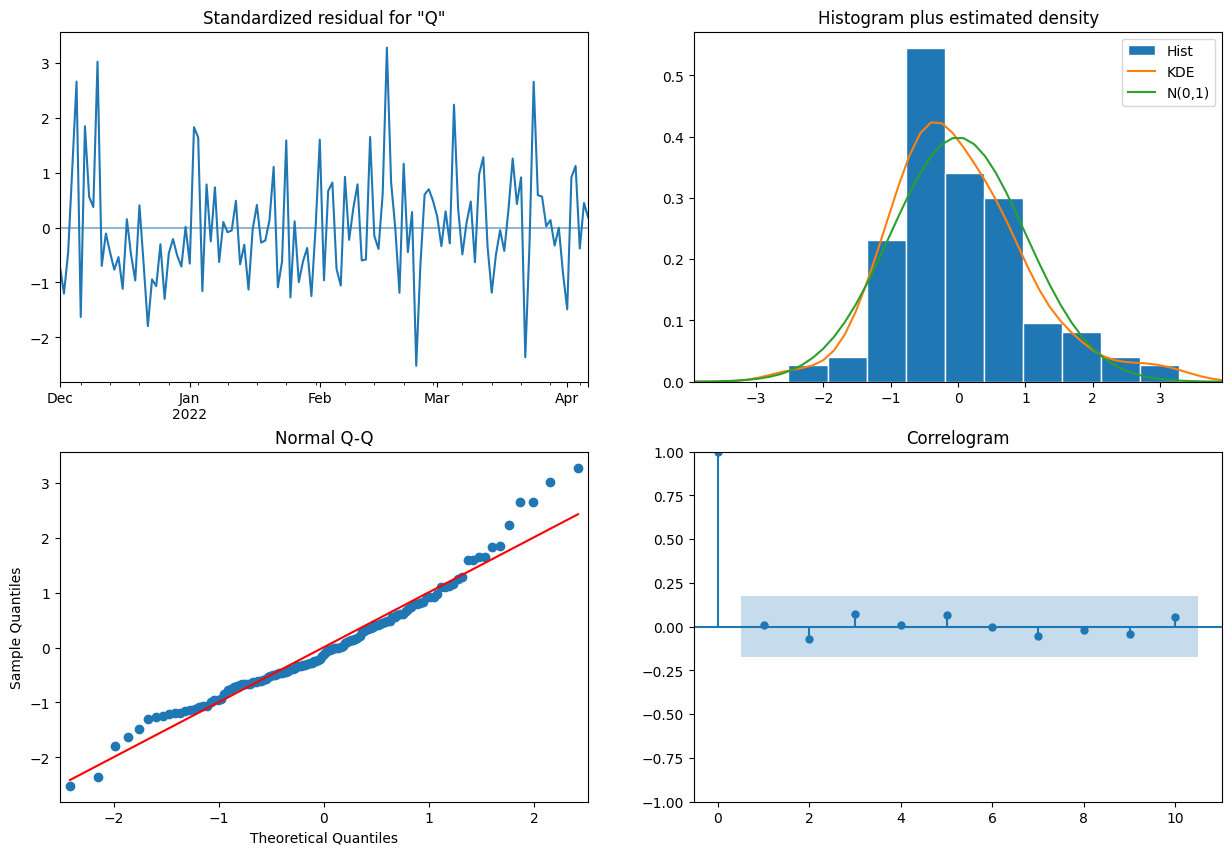

Forecasted values:
 2022-04-07    19.004624
2022-04-08    18.798935
2022-04-09    18.645048
2022-04-10    18.529916
2022-04-11    18.443780
2022-04-12    18.379337
2022-04-13    18.331123
2022-04-14    18.295052
2022-04-15    18.268065
2022-04-16    18.247875
Freq: D, Name: predicted_mean, dtype: float64


In [30]:
# Plot residuals
result.plot_diagnostics(figsize=(15, 10))
plt.show()

# Forecast
forecast = result.forecast(steps=10)  # Adjust the number of steps as needed
print("Forecasted values:\n", forecast)